In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df = df.drop(columns="sex",axis=1)

In [6]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

1 -> Heart Disease Risk
0 -> No Heart Disease Risk

<AxesSubplot:xlabel='target', ylabel='count'>

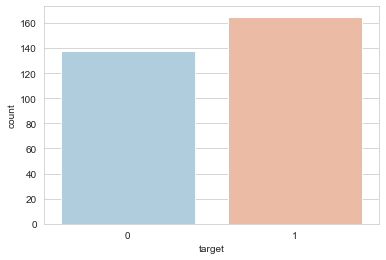

In [7]:
import seaborn as sns
sns.set_style("whitegrid")
sns.countplot(x = "target", data=df, palette="RdBu_r")

In [8]:
df.groupby("target").mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,
0,56.601449,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


<AxesSubplot:>

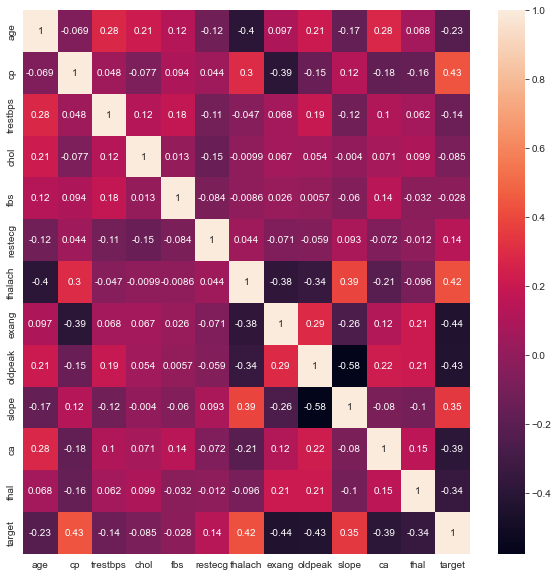

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2g")

In [10]:
X = df.drop(columns="target",axis=1)
Y = df["target"]

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_X = scaler.fit_transform(X)

X = standardized_X
Y = df["target"]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, stratify=Y,random_state=42)
print(X.shape,X_train.shape,X_test.shape)

(303, 12) (242, 12) (61, 12)


In [13]:
from sklearn import svm

svm_classifier = svm.SVC(kernel="linear")
svm_classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [14]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train,Y_train)

LogisticRegression()

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [17]:
from sklearn.metrics import accuracy_score

#SVM
X_train_prediction_SVM = svm_classifier.predict(X_train)
train_acc_SVM = accuracy_score(X_train_prediction_SVM,Y_train)

X_test_prediction_SVM = svm_classifier.predict(X_test)
test_acc_SVM = accuracy_score(X_test_prediction_SVM,Y_test)

#Logistic Regression
X_train_prediction_lr = lr_classifier.predict(X_train)
train_acc_lr = accuracy_score(X_train_prediction_lr,Y_train)

X_test_prediction_lr = lr_classifier.predict(X_test)
test_acc_lr = accuracy_score(X_test_prediction_lr,Y_test)

#Decision Tree
X_train_prediction_dt = dt_classifier.predict(X_train)
train_acc_dt = accuracy_score(X_train_prediction_dt,Y_train)

X_test_prediction_dt = dt_classifier.predict(X_test)
test_acc_dt = accuracy_score(X_test_prediction_dt,Y_test)

#Random Forest
X_train_prediction_rf = rf_classifier.predict(X_train)
train_acc_rf = accuracy_score(X_train_prediction_rf,Y_train)

X_test_prediction_rf = rf_classifier.predict(X_test)
test_acc_rf = accuracy_score(X_test_prediction_rf,Y_test)

print("Training Accuracy:-\n1. SVM\t\t\t",train_acc_SVM,"\n2. Logistic Regression\t",train_acc_lr,"\n3. Decision Tree\t",train_acc_dt,"\n4. Random Forest\t",train_acc_rf)
print("\n\nTest Accuracy:-\n1. SVM\t\t\t",test_acc_SVM,"\n2. Logistic Regression\t",test_acc_lr,"\n3. Decision Tree\t",test_acc_dt,"\n4. Random Forest\t",test_acc_rf)

Training Accuracy:-
1. SVM			 0.8636363636363636 
2. Logistic Regression	 0.8429752066115702 
3. Decision Tree	 1.0 
4. Random Forest	 1.0


Test Accuracy:-
1. SVM			 0.8032786885245902 
2. Logistic Regression	 0.7704918032786885 
3. Decision Tree	 0.7704918032786885 
4. Random Forest	 0.7868852459016393


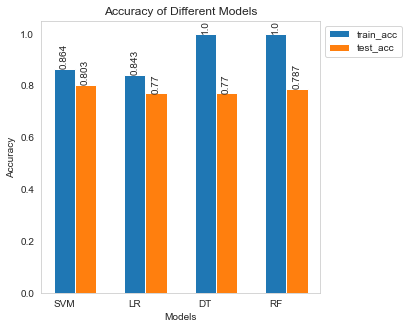

In [24]:
algo_names = ["SVM","LR","DT","RF"]
train_acc = [round(train_acc_SVM,3),round(train_acc_lr,3),round(train_acc_dt,3),round(train_acc_rf,3)]
test_acc =[round(test_acc_SVM,3),round(test_acc_lr,3),round(test_acc_dt,3),round(test_acc_rf,3)]
X_axis = np.arange(len(algo_names))

plt.figure(figsize=(5,5))
bar_width = 0.3
plt.bar(algo_names, train_acc, width=bar_width, align='center', label='train_acc')
plt.bar([i + bar_width for i in range(len(algo_names))], test_acc, width=bar_width, align='center', label='test_acc')

for i, model in enumerate(algo_names):
    plt.text(i, train_acc[i], str(train_acc[i]), ha='center', va='bottom', rotation=90)
    plt.text(i + bar_width, test_acc[i], str(test_acc[i]), ha='center', va='bottom', rotation=90)

plt.xticks(X_axis, algo_names)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim(top=max(max(train_acc), max(test_acc)) + 0.05)
plt.grid(visible=False)
plt.show()

35,1,122,192,0,1,174,0,0,2,0,2   -> 1
53,0,140,203,1,0,155,1,3.1,0,0,3 -> 0
56,2,130,256,1,0,142,1,0.6,1,1,1 -> 0
58,0,130,197,0,1,131,0,0.6,1,0,2 -> 1

In [19]:
#USING TEST DATA
input_data = (58,0,130,197,0,1,131,0,0.6,1,0,2)

# Converting input data into a numpy array
input_data = np.asarray(input_data)

# Reshaping the numpy array to inform the model that only one input and not 768 is being provided
input_data = input_data.reshape(1,-1)

# Standardizing the input data
standardized_input_data = scaler.transform(input_data)

# Prediciting
prediction = lr_classifier.predict(standardized_input_data)

if prediction == 0:
    print("Prediciton Result: No Heart Disease")
else:
    print("Prediciton Result: Prone to Heart Disease")

Prediciton Result: Prone to Heart Disease


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
import pickle

filename = "heart_model.sav"
pickle.dump(lr_classifier,open(filename,"wb"))

In [21]:
loaded_model = pickle.load(open("heart_model.sav","rb"))